In [10]:
using Plots, DifferentialEquations,LaTeXStrings

In [11]:
#def the problem
"""
du = change in state 
u = current state (ρ₂₂,ρ₁₁,ρ₂₁, ρ₁₂)
p = parameters (γ,Ω,γ⟂,Δ)
t = time

"""
function bloch!(du, u, p, t) 
    du[1] = -p[1]*u[1]-(im/2 *p[2]*u[3]-im/2*conj(p[2])*u[4]  )
    du[2] = +p[1]*u[1]+(im/2 *p[2]*u[3]-im/2*conj(p[2])*u[4]  )
    du[3] = -(im*p[4]+p[3])*u[3]-im/2*p[2]*(u[1]-u[2])
    du[4] = -(-im*p[4]+p[3])*u[4]+im/2*p[2]*(u[1]-u[2])
end


bloch!

In [16]:
#rate equations
function rateeq(t,P_10,P_20,A,B)
    P_1 = P_10-1/(A+2*B)*(1-exp(-(A+2*B)*t))*(B*P_10-(A+B)*P_20)
    P_2 = P_20+1/(A+2*B)*(1-exp(-(A+2*B)*t))*(B*P_10-(A+B)*P_20)
    return P_2,P_1
end

rateeq (generic function with 1 method)

In [70]:
"""
p = parameters (γ,Ω,γ⟂,Δ)
"""
function getEinstein(p)
    A= p[4]^2+p[3]^2
    B = p[3]/(2*p[1])*p[2]^2
    return A,B
end

getEinstein

## Sanity check
### solve problem problem :

In [71]:
# initial values
u0 = ComplexF64[0.0; 1.0;0.0;0.0] #u = current state (ρ₂₂,ρ₁₁,ρ₂₁, ρ₁₂)
# time to solve
tspan = (0.0, 100.0)
p = [0.1,1.0,0.1,0] #p = parameters (γ,Ω,γ⟂,Δ)
prob = ODEProblem(bloch!, u0, tspan, p)
sol = solve(prob) 

retcode: Success
Interpolation: specialized 7th order lazy interpolation, specialized 4rd order "free" stiffness-aware interpolation
t: 65-element Vector{Float64}:
   0.0
   0.0014128007616114838
   0.015540808377726322
   0.15062607302875441
   0.4678646716490613
   0.9597373532500554
   1.5882937611531625
   2.3306242004926268
   3.15225045307419
   4.0364852867944085
   ⋮
  77.8755631029468
  80.69574646721061
  83.04763875323805
  85.71505937837415
  88.28474124649486
  91.12912779449007
  94.43547779246455
  97.47454299833933
 100.0
u: 65-element Vector{Vector{ComplexF64}}:
 [0.0 + 0.0im, 1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]
 [4.98954418187889e-7 + 0.0im, 0.9999995010455818 + 0.0im, 0.0 + 0.0007063502480341813im, 0.0 - 0.0007063502480341813im]
 [6.0315447918374653e-5 + 0.0im, 0.9999396845520816 + 0.0im, 0.0 + 0.0077640569850083345im, 0.0 - 0.0077640569850083345im]
 [0.005604828984565383 + 0.0im, 0.9943951710154346 + 0.0im, 0.0 + 0.07446739873888722im, 0.0 - 0.07446739873888722im

In [72]:
#function for plotting
f(t, x ) = (t, real(x))

f (generic function with 1 method)

In [73]:

Ps = (rateeq.(0:0.1:100,1,0,getEinstein(p)...))
P1 = [x[1] for x in Ps]
P2 = [x[2] for x in Ps]

1001-element Vector{Float64}:
 1.0
 0.9524420954880516
 0.9094529346248696
 0.8705936120645954
 0.8354673867667965
 0.8037156313995251
 0.7750141708709373
 0.7490699726070771
 0.7256181547846338
 0.7044192819737058
 ⋮
 0.504950495049505
 0.504950495049505
 0.504950495049505
 0.504950495049505
 0.504950495049505
 0.504950495049505
 0.504950495049505
 0.504950495049505
 0.504950495049505

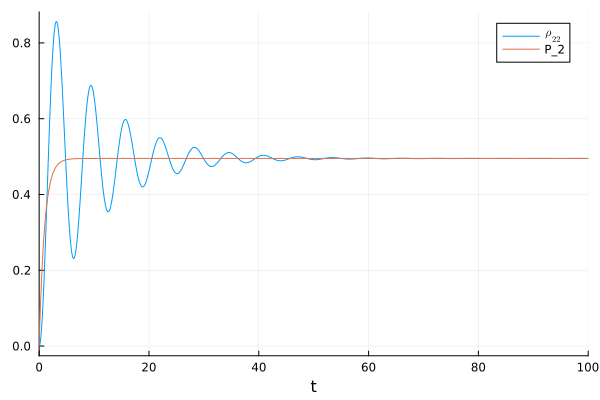

In [74]:
plot(sol,idxs =(f,0,1),label=L"\rho_{22}")
# plot!(0:0.1:100,t->1*exp(-p[1]*t),ls=:dash,label="theory")
plot!(0:0.1:100, P1,label="P_2")
# plot!(sol,idxs =(f,0,2),label=L"\rho_{11}")
# plot!(0:0.1:100, P2,label="P_2")
# savefig("test.pdf")